# Compare The Calculation Time for KSVD and Approximate KSVD

In [8]:
import time

import sys
sys.path.append('..')
from spmimage.decomposition import KSVD

import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline
%load_ext autoreload
%autoreload 1

def generate_input(n_samples: int, n_features: int, n_components: int, k0: int):
    # random dictionary base
    A0 = np.random.randn(n_components, n_features)
    A0 = np.dot(A0, np.diag(1. / np.sqrt(np.diag(np.dot(A0.T, A0)))))

    X = np.zeros((n_samples, n_features))
    for i in range(n_samples):
        # select k0 components from dictionary
        X[i, :] = np.dot(np.random.randn(k0), A0[np.random.permutation(range(n_components))[:k0], :])
    return A0, X

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Samplewise

In [40]:
# Set Parameters
k0 = 4
n_features = 100
n_components = 10
max_iter = 100

ksvd_time = []
ksvd_error = []
approx_ksvd_time = []
approx_ksvd_error = []

sample_num = range(10, 200, 10)
for n_samples in sample_num:
    A0, X = generate_input(n_samples, n_features, n_components, k0)
    
    start = time.time()
    model = KSVD(n_components=n_components, k0=k0, max_iter=max_iter)
    model.fit(X)
    ksvd_time.append(time.time() - start)
    ksvd_error.append(model.error_[-1])
    
    start = time.time()
    approx_model = KSVD(n_components=n_components, k0=k0, max_iter=max_iter, method="approximate")
    approx_model.fit(X)
    approx_ksvd_time.append(time.time() - start)
    approx_ksvd_error.append(approx_model.error_[-1])  

/Users/masui/develop/spm-image/examples_venv/lib/python3.6/site-packages/sklearn/decomposition/dict_learning.py:160: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


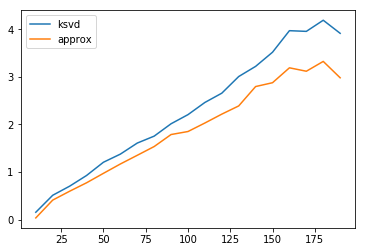

In [41]:
# time
plt.plot(sample_num, ksvd_time, label='ksvd')
plt.plot(sample_num, approx_ksvd_time, label='approx')
plt.legend()

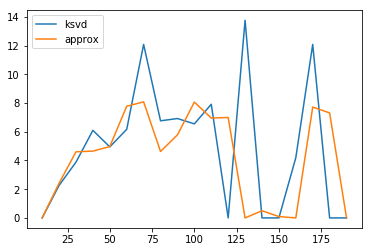

In [42]:
# error
plt.plot(sample_num, ksvd_error, label='ksvd')
plt.plot(sample_num, approx_ksvd_error, label='approx')
plt.legend()

# Featurewize

In [43]:
# Set Parameters
k0 = 4
n_samples = 100
n_components = 10
max_iter = 100

ksvd_time = []
ksvd_error = []
approx_ksvd_time = []
approx_ksvd_error = []

feature_num = range(10, 200, 10)
for n_features in feature_num:
    A0, X = generate_input(n_samples, n_features, n_components, k0)
    
    start = time.time()
    model = KSVD(n_components=n_components, k0=k0, max_iter=max_iter)
    model.fit(X)
    ksvd_time.append(time.time() - start)
    ksvd_error.append(model.error_[-1])
    
    start = time.time()
    approx_model = KSVD(n_components=n_components, k0=k0, max_iter=max_iter, method="approximate")
    approx_model.fit(X)
    approx_ksvd_time.append(time.time() - start)
    approx_ksvd_error.append(approx_model.error_[-1])  

/Users/masui/develop/spm-image/examples_venv/lib/python3.6/site-packages/sklearn/decomposition/dict_learning.py:160: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


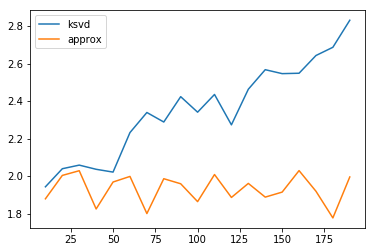

In [44]:
# time
plt.plot(feature_num, ksvd_time, label='ksvd')
plt.plot(feature_num, approx_ksvd_time, label='approx')
plt.legend()

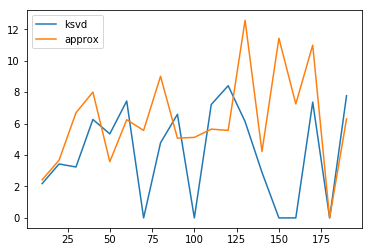

In [45]:
# error
plt.plot(feature_num, ksvd_error, label='ksvd')
plt.plot(feature_num, approx_ksvd_error, label='approx')
plt.legend()

# ComponentWize

In [ ]:
# Set Parameters
k0 = 4
n_samples = 100
n_features = 100
max_iter = 100

ksvd_time = []
ksvd_error = []
approx_ksvd_time = []
approx_ksvd_error = []

component_num = range(10, 200, 10)
for n_component in component_num:
    A0, X = generate_input(n_samples, n_features, n_components, k0)
    
    start = time.time()
    model = KSVD(n_components=n_components, k0=k0, max_iter=max_iter)
    model.fit(X)
    ksvd_time.append(time.time() - start)
    ksvd_error.append(model.error_[-1])
    
    start = time.time()
    approx_model = KSVD(n_components=n_components, k0=k0, max_iter=max_iter, method="approximate")
    approx_model.fit(X)
    approx_ksvd_time.append(time.time() - start)
    approx_ksvd_error.append(approx_model.error_[-1])  

/Users/masui/develop/spm-image/examples_venv/lib/python3.6/site-packages/sklearn/decomposition/dict_learning.py:160: RuntimeWarning:  Orthogonal matching pursuit ended prematurely due to linear
dependence in the dictionary. The requested precision might not have been met.

  copy_Xy=copy_cov).T


In [ ]:
# time
plt.plot(component_num, ksvd_time, label='ksvd')
plt.plot(component_num, approx_ksvd_time, label='approx')
plt.legend()

In [ ]:
# error
plt.plot(component_num, ksvd_error, label='ksvd')
plt.plot(component_num, approx_ksvd_error, label='approx')
plt.legend()